# Introduction to Matplotlib

The **Matplotlib** package can be used to make scientific-grade plots. You can import it with:

In [1]:
import matplotlib.pyplot as plt

If you are using IPython and you want to make interactive plots, you can start up IPython with:

    ipython --matplotlib

If you now type a plotting command, an interactive plot will pop up.

If you use the IPython notebook, add a cell containing:

In [2]:
%matplotlib inline

and the plots will appear inside the notebook.

## Basic plotting

The main plotting function is called ``plot``:

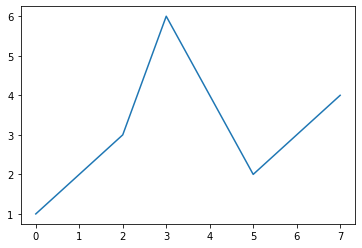

In [3]:
plt.plot([1,2,3,6,4,2,3,4])

In the above example, we only gave a single list, so it will assume the x values are the indices of the list/array.

However, we can instead specify the x values:

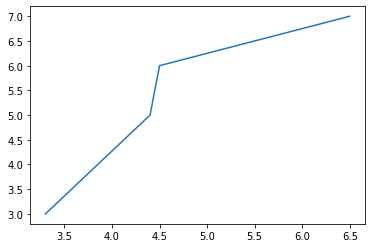

In [4]:
plt.plot([3.3, 4.4, 4.5, 6.5], [3., 5., 6., 7.])

Matplotlib can take Numpy arrays, so we can do for example:

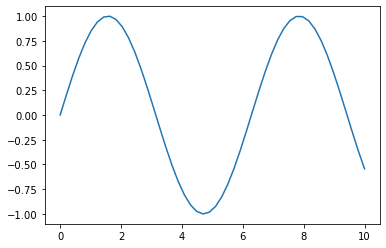

In [5]:
import numpy as np
x = np.linspace(0., 10., 50)
y = np.sin(x)
plt.plot(x, y)

The ``plot`` function is actually quite complex, and for example can take arguments specifying the type of point, the color of the line, and the width of the line:

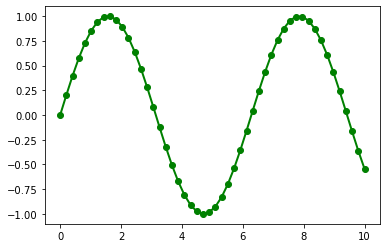

In [6]:
plt.plot(x, y, marker='o', color='green', linewidth=2)

The line can be hidden with:

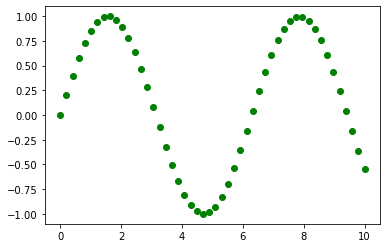

In [7]:
plt.plot(x, y, marker='o', color='green', linewidth=0)

If you are interested, you can specify some of these attributes with a special syntax, which you can read up more about in the Matplotlib documentation:

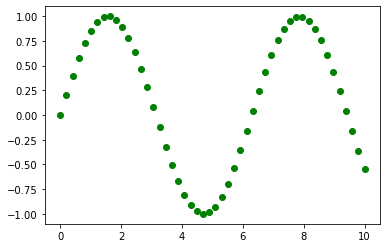

In [8]:
plt.plot(x, y, 'go')  # means green and circles

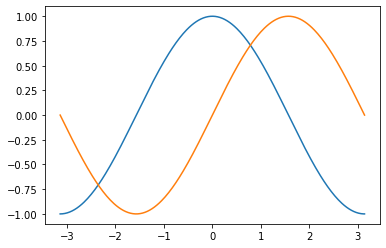

In [9]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)


## Exercise

We start off by loading the ``data/munich_temperatures_average_with_bad_data.txt`` file which we encountered in the Numpy lecture:

In [10]:
# The following code reads in the file and removes bad values
import numpy as np
date, temperature = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = np.abs(temperature) < 90
date = date[keep]
temperature = temperature[keep]

Now that the data has been read in, plot the temperature against time:

In [11]:
# your solution here

Next, try plotting the data against the fraction of the year (all years on top of each other). Note that you can use the ``%`` (modulo) operator to find the fractional part of the dates:

In [12]:
# your solution here

## Customizing plots

(0.0, 1.0)

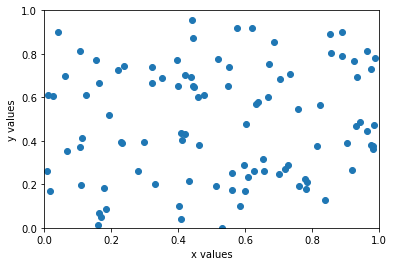

In [13]:
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x, y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.xlim(0., 1.)
plt.ylim(0., 1.)

(-1.1, 1.0999165211263138)

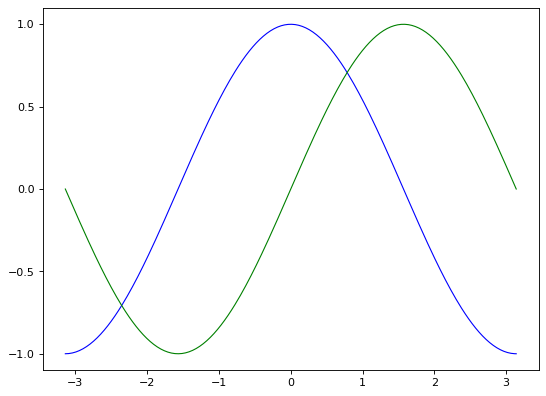

In [14]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5))

# Limits
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)


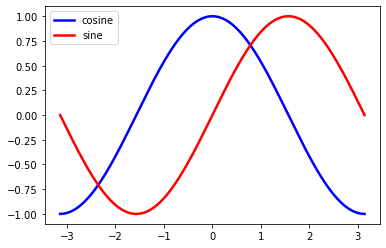

In [15]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

plt.legend(loc='upper left')

## Other types of plots

<center> <img src="img/matplotlib_ex.png" width="1600"/> </center>

### Scatter plots

While the ``plot`` function can be used to show scatter plots, it is mainly used for line plots, and the ``scatter`` function is more often used for scatter plots, because it allows more fine control of the markers:

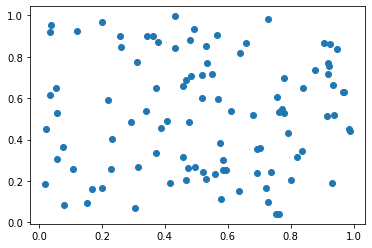

In [16]:
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x, y)

### Histograms

Histograms are easy to plot using the ``hist`` function:

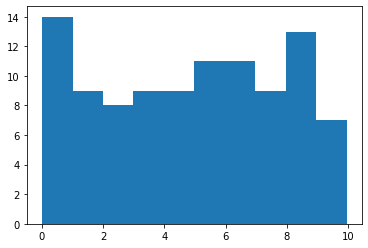

In [17]:
v = np.random.uniform(0., 10., 100)
h = plt.hist(v)  # we do h= to capture the output of the function, but we don't use it

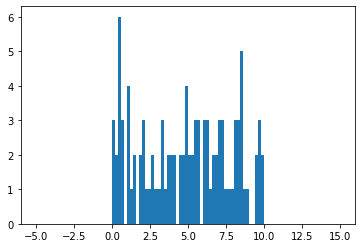

In [18]:
h = plt.hist(v, range=[-5., 15.], bins=100)

### Images

You can also show two-dimensional arrays with the ``imshow`` function:

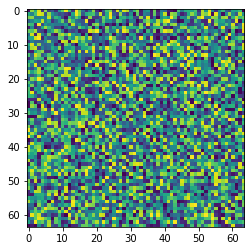

In [19]:
array = np.random.random((64, 64))
plt.imshow(array)

And the colormap can be changed:

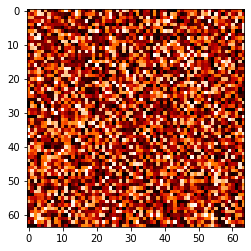

In [20]:
plt.imshow(array, cmap=plt.cm.gist_heat)

### Contour

<ipython-input-21-2e389014e74d>:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)


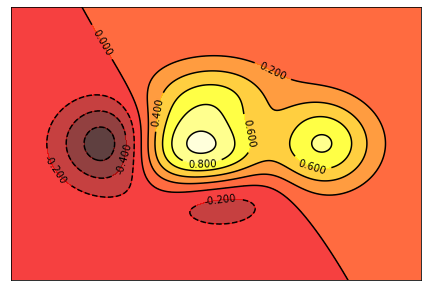

In [21]:
def f(x,y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([])
plt.yticks([])
plt.show()

### Polar plots

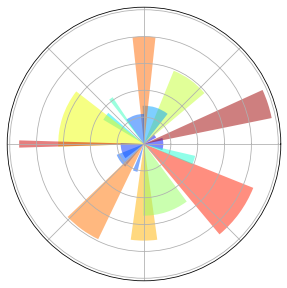

In [22]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

## Saving plots to files

To save a plot to a file, you can do for example:

In [23]:
plt.savefig('my_plot.png')

<Figure size 432x288 with 0 Axes>

and you can then view the resulting file like you would iew a normal image. On Linux, you can also do:

    $ xv my_plot.png

in the terminal.

## Learning more

The easiest way to find out more about a function and available options is to use the ``?`` help in IPython:

        In [11]: plt.hist?

    Definition: plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, **kwargs)
    Docstring:
    Plot a histogram.

    Call signature::

      hist(x, bins=10, range=None, normed=False, weights=None,
             cumulative=False, bottom=None, histtype='bar', align='mid',
             orientation='vertical', rwidth=None, log=False,
             color=None, label=None, stacked=False,
             **kwargs)

    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.

    etc.

But sometimes you don't even know how to make a specific type of plot, in which case you can look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) for example plots and scripts.


## Exercise

Use Numpy to generate 10000 random values following a Gaussian/Normal distribution, and make a histogram. Try changing the number of bins to properly see the Gaussian. Try overplotting a Gaussian function on top of it using a colored line, and adjust the normalization so that the histogram and the line are aligned.

In [24]:

# your solution here
